<a href="https://colab.research.google.com/github/woody-sam/Customer-Segmentation-usung-k-Means-clustering-/blob/main/customer_segmentation_using_k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

customer segmentation

import the dependencies


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

data collection and analysis


In [3]:
#loading the data from csv file to a pandas dataframe
customer_Data = pd.read_csv('Mall_Customers.csv')

In [4]:
#first 5 rows in the dataframe
customer_Data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#finding the number of rows and columns
customer_Data.shape


(200, 5)

In [6]:
#getting some information about the dataset
customer_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
#checking for missing values
customer_Data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


choosing the annual income column and spending score column

In [8]:
x=customer_Data.iloc[:,[3,4]].values

In [9]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

choosing the number of clusters
paramter: WCSS- WITHIN CLUSTERS SUM OF SQUARES

In [11]:
#finding wcss value for different number of clusters

wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x)

  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

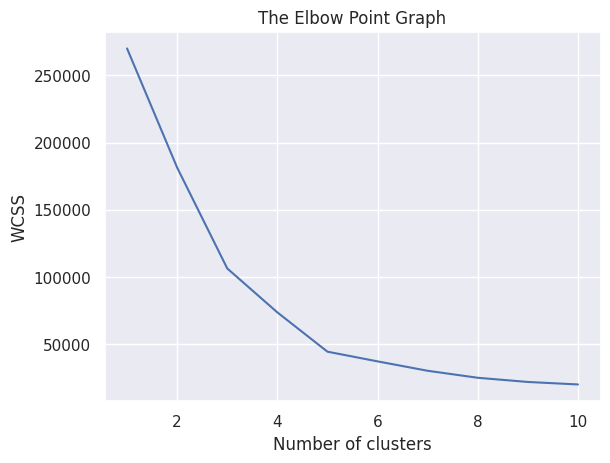

In [12]:
#plot an elbow graph to find which cluster has minimum value

sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

the optimum number of clusters are 5 from elbow point graph

Training the kmeans clustering model;
value of k=5

In [14]:
kmeans=KMeans(n_clusters=5, init='k-means++', random_state=0)

#return a label for each data point based on their cluster
y=kmeans.fit_predict(x)
print(y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


5 clusters=0,1,2,3,4

visualize all the clusters

all 0 =annual income; all 1=spending score

s represents size of dots

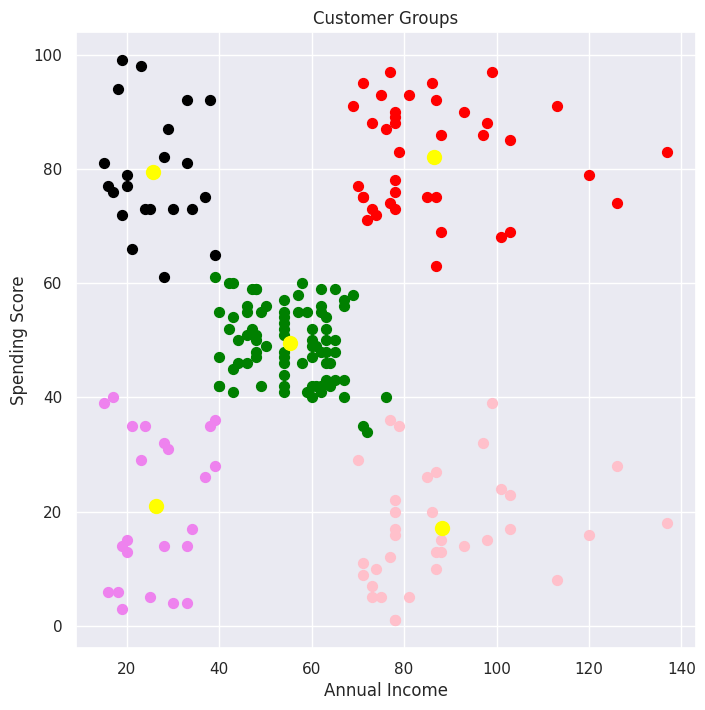

In [18]:
#plotting all the clusters and their centriods

plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0], x[y==0,1], s=50, c='green', label='Cluster1')
plt.scatter(x[y==1,0], x[y==1,1], s=50, c='red', label='Cluster2')
plt.scatter(x[y==2,0], x[y==2,1], s=50, c='pink', label='Cluster3')
plt.scatter(x[y==3,0], x[y==3,1], s=50, c='violet', label='Cluster4')
plt.scatter(x[y==4,0], x[y==4,1], s=50, c='black', label='Cluster5')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='yellow', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


<ipython-input-22-4cb73054f807>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_Data['Age'])


Text(0, 0.5, 'Count')

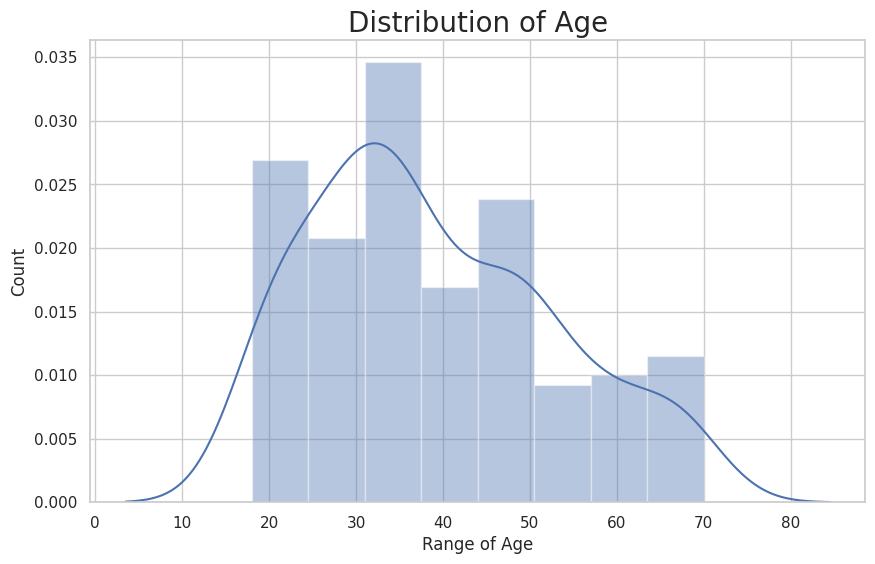

In [22]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(customer_Data['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

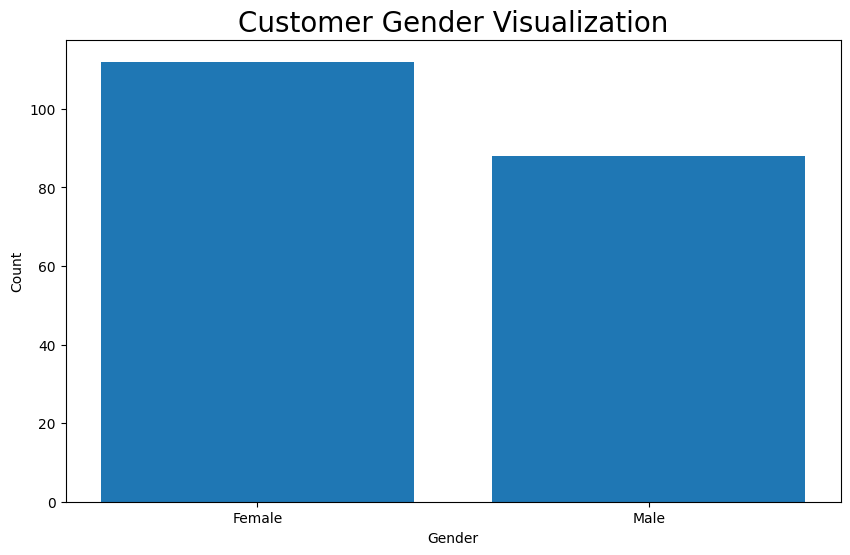

In [7]:
#customer gender visualization
import matplotlib.pyplot as plt
import pandas as pd
customer_Data=pd.read_csv('Mall_Customers.csv')
plt.figure(figsize=(10, 6))
plt.bar(customer_Data['Gender'].value_counts().index, customer_Data['Gender'].value_counts())
plt.title('Customer Gender Visualization', fontsize = 20)
plt.xlabel('Gender')
plt.ylabel('Count')


([<matplotlib.patches.Wedge at 0x78fa2f49b370>,
 [Text(-0.20611945413751356, 1.080515974257694, 'Female'),
  Text(0.20611945413751367, -1.080515974257694, 'Male')],
 [Text(-0.11242879316591647, 0.5893723495951058, '56.0%'),
  Text(0.11242879316591654, -0.5893723495951058, '44.0%')])

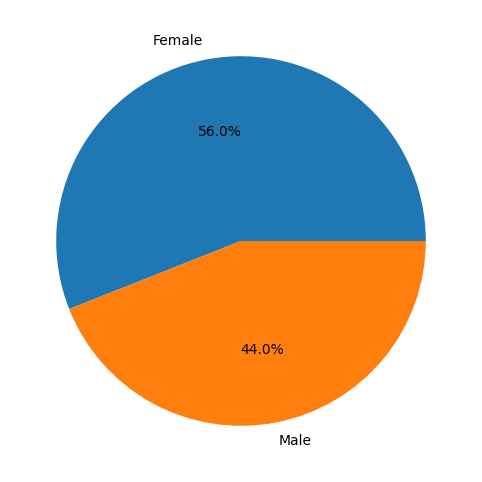

In [9]:
#visualize a pie chart to observe the ratio of male and female distribution

plt.figure(figsize=(10, 6))
plt.pie(customer_Data['Gender'].value_counts(), labels=customer_Data['Gender'].value_counts().index, autopct='%1.1f%%')

Text(0, 0.5, 'Count')

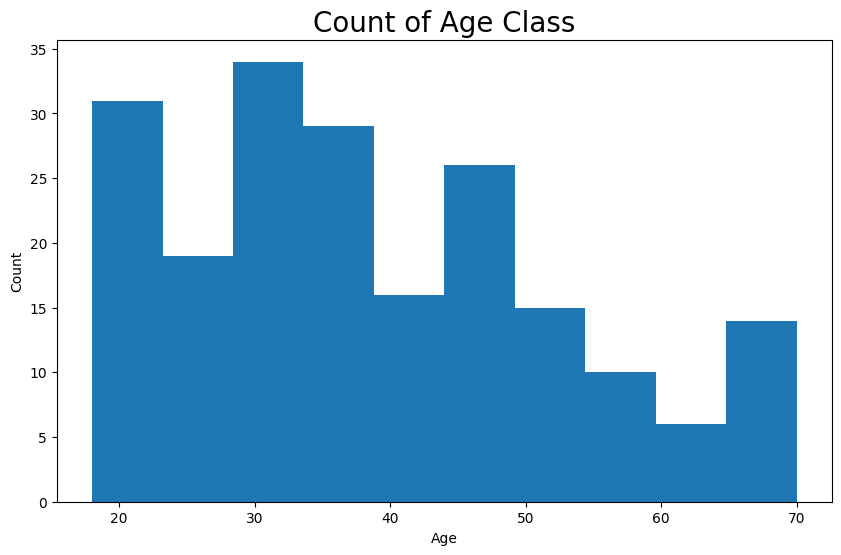

In [10]:
#histogram to show count of Age class
plt.figure(figsize=(10, 6))
plt.hist(customer_Data['Age'], bins=10)
plt.title('Count of Age Class', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')


Text(0.5, 0, 'Age')

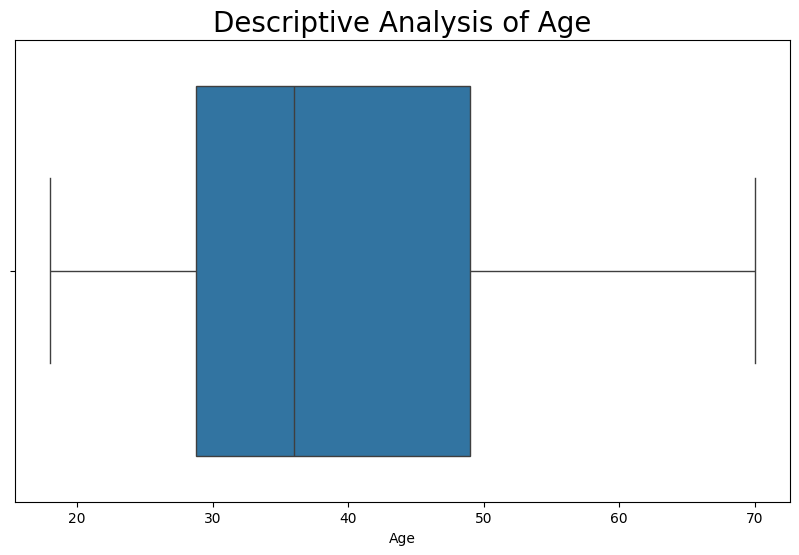

In [13]:
#visulaize using boxplot for descriptive analysis of age

import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', data=customer_Data)
plt.title('Descriptive Analysis of Age', fontsize = 20)
plt.xlabel('Age')

In [16]:
#normalise the numerical features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customer_Data[['Annual Income (k$)','Spending Score (1-100)']] = scaler.fit_transform(customer_Data[['Annual Income (k$)','Spending Score (1-100)']])


In [17]:
#encode categorical variables

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
customer_Data['Gender'] = encoder.fit_transform(customer_Data['Gender'])



In [18]:
#provide insights for marketing stratergies

customer_Data.groupby('Gender').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
0,97.562500,38.098214,-0.050002,0.051508
1,104.238636,39.806818,0.063639,-0.065555


In [19]:
#provide a compelete report

customer_Data.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02
mean,100.500000,0.440000,38.850000,7.105427e-17,7.549517e-17
std,57.879185,0.497633,13.969007,1.002509e+00,1.002509e+00
min,1.000000,0.000000,18.000000,-1.738999e+00,-1.910021e+00
25%,50.750000,0.000000,28.750000,-7.275093e-01,-5.997931e-01
50%,100.500000,0.000000,36.000000,3.587926e-02,-7.764312e-03
75%,150.250000,1.000000,49.000000,6.656748e-01,8.851316e-01
max,200.000000,1.000000,70.000000,2.917671e+00,1.894492e+00


<Axes: >

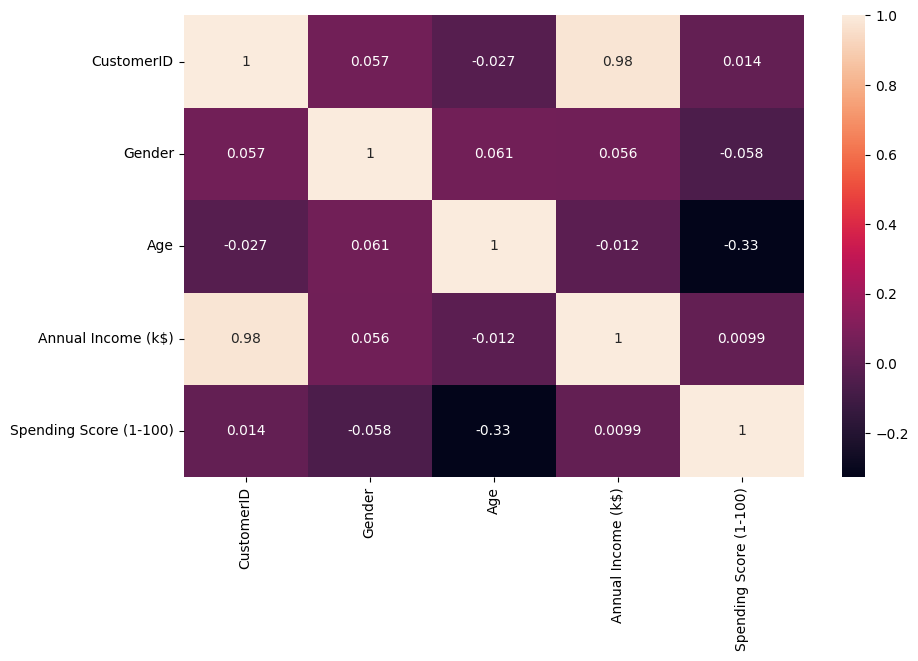

In [20]:
#provide this report on a plot

plt.figure(figsize=(10, 6))
sns.heatmap(customer_Data.corr(), annot=True)

Text(0.5, 0, 'Annual Income (k$)')

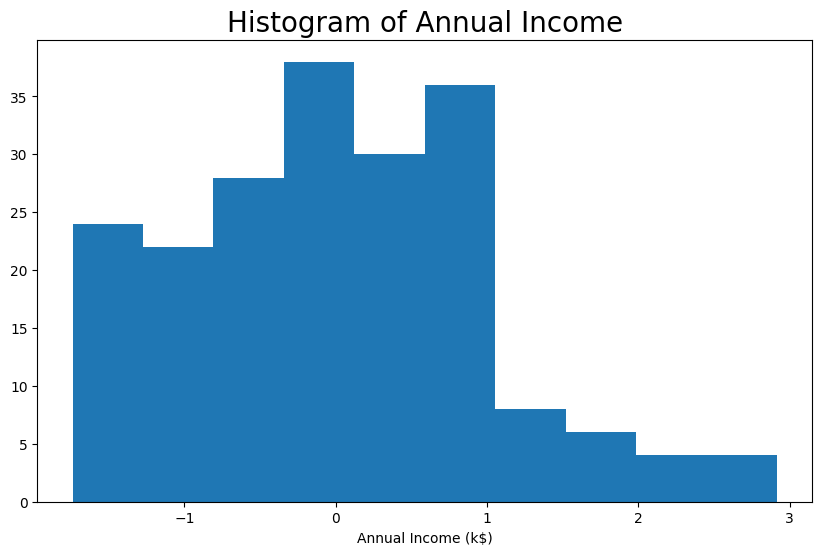

In [21]:
#histogram for annual income

plt.figure(figsize=(10, 6))
plt.hist(customer_Data['Annual Income (k$)'], bins=10)
plt.title('Histogram of Annual Income', fontsize = 20)
plt.xlabel('Annual Income (k$)')

Text(0.5, 1.0, 'Boxplot of Annual Income')

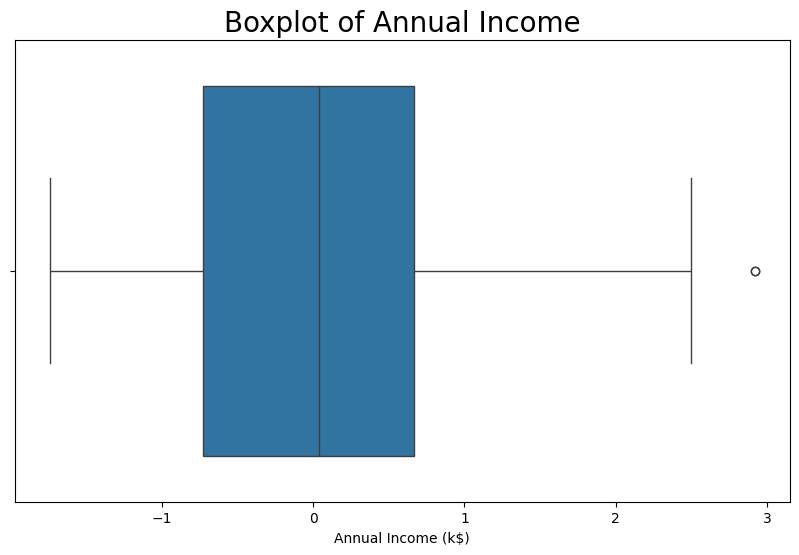

In [22]:
#histogram for each variable for annual income

plt.figure(figsize=(10, 6))
sns.boxplot(x='Annual Income (k$)', data=customer_Data)
plt.title('Boxplot of Annual Income', fontsize = 20)

Text(0.5, 1.0, 'Density Plot of Annual Income')

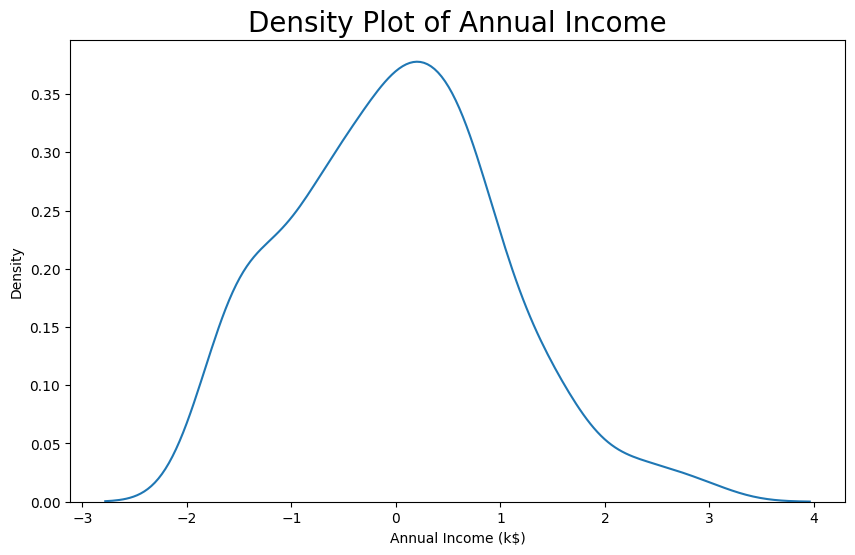

In [23]:
#density plot for annual income

plt.figure(figsize=(10, 6))
sns.kdeplot(customer_Data['Annual Income (k$)'])
plt.title('Density Plot of Annual Income', fontsize = 20)

Text(0.5, 1.0, 'Boxplot of Spending Scores')

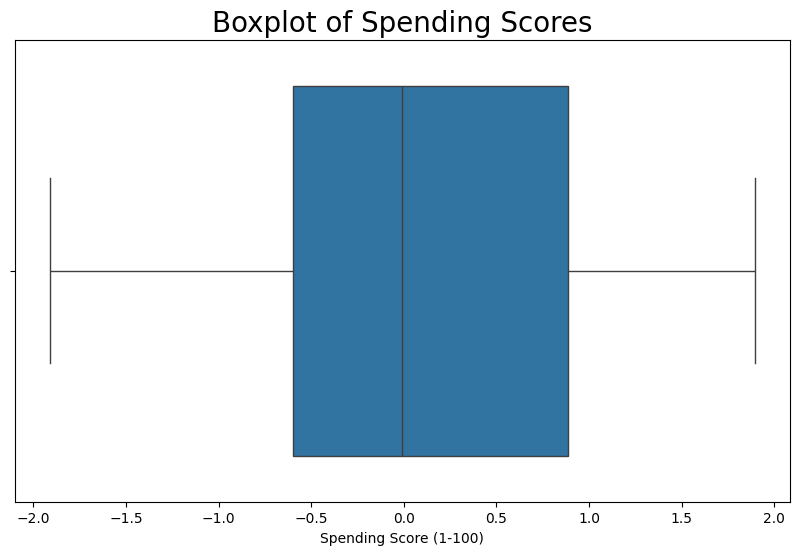

In [24]:
#boxplot for spending scores of customer

plt.figure(figsize=(10, 6))
sns.boxplot(x='Spending Score (1-100)', data=customer_Data)
plt.title('Boxplot of Spending Scores', fontsize = 20)

Text(0.5, 1.0, 'Histogram of Spending Scores')

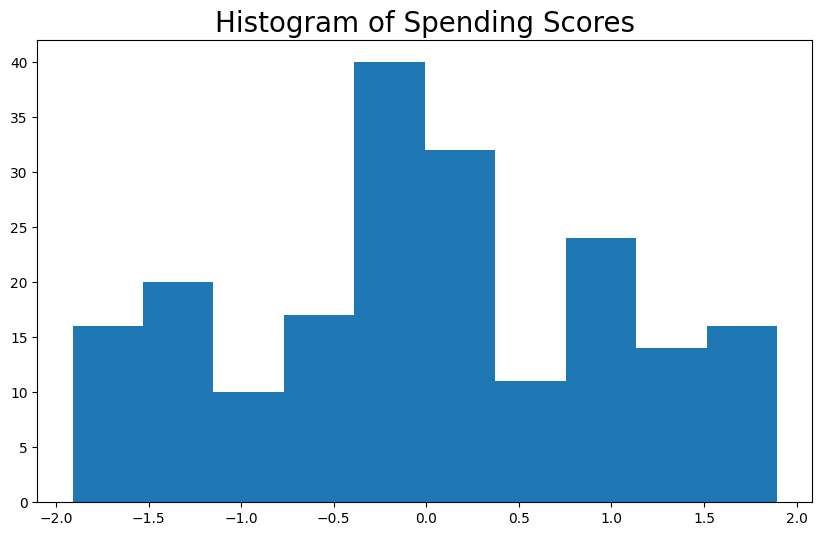

In [25]:
#histogram for spending scores

plt.figure(figsize=(10, 6))
plt.hist(customer_Data['Spending Score (1-100)'], bins=10)
plt.title('Histogram of Spending Scores', fontsize = 20)

Text(0.5, 1.0, 'Histogram of Spending Scores')

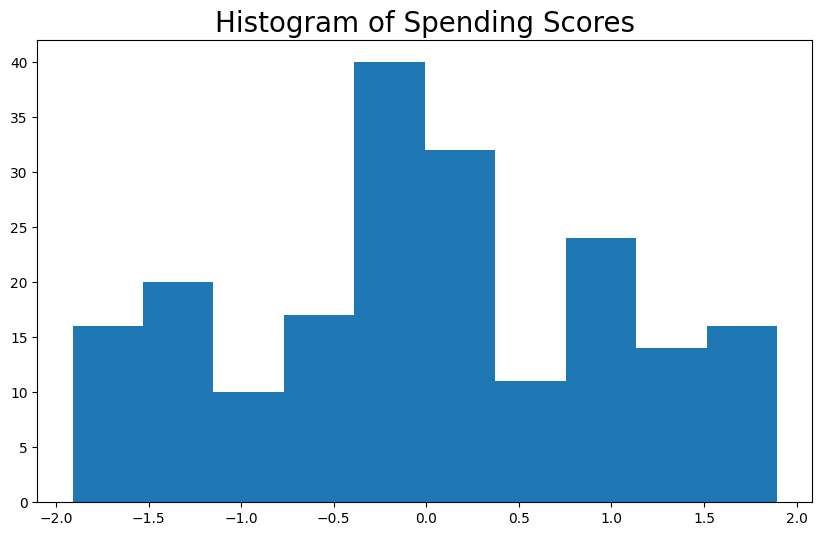

In [26]:
#histogram for spending scores with x axis for spending score class and y axis for frequency

plt.figure(figsize=(10, 6))
plt.hist(customer_Data['Spending Score (1-100)'], bins=10)
plt.title('Histogram of Spending Scores', fontsize = 20)